# MIS373 - AI For Business - Assignment 2 - Task 1

## Task 1: House Price Prediction

**Student Name:** Lexi Nguyen

**Student ID:** 222363222

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [AI Model Development](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

As part of an initiative by Management of Deep AI, I was invited to contribute my expertise in developing AI solutions for two distinct clients: a real estate company and a weather monitoring agency. The focus of this report is on the first task-predicting house prices for the real estate company using a dataset of approximately 20,000 house sales in Washington, USA.

The primary goal was to construct and refine various predictive models to not only forecast house prices effectively but also to ascertain which model performs optimally based on a set of given architectural parameters. The project involved meticulous data preparation-cleaning, normalizing, and splitting the dataset, with 70% allocated for training and the remaining 30% for testing. I evaluated multiple models ranging from straightforward linear regression to more complex neural networks, each varying in architecture to capture different levels of non-linear relationships within the data.

My experiments led to some compelling discoveries. Among the tested models, a Multi-Layer Perceptron (MLP) with two hidden layers of 128 and 64 neurons respectively stood out, exhibiting superior performance in terms of predictive accuracy and ability to generalize on unseen data. This model not only had the lowest Mean Squared Error (MSE) but also the highest R² score on the validation dataset, making it the most reliable among the contenders.

Implementing this MLP model in real-world scenarios holds immense potential. It could revolutionize how real estate platforms provide real-time property valuations, assist investors in identifying profitable buying or selling opportunities, and enable homeowners to track the value of their properties for insurance and tax purposes. However, deploying this technology involves several considerations-regular model updates to adapt to new market conditions, ensuring the system's scalability to manage large user bases, and strict adherence to data privacy laws to protect user information.





<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

When I first began working with the house price dataset, my initial task was to load the data from a CSV file located at My Drive.

After successfully loading the dataset, I set the 'id' column as the index of our DataFrame, recognizing its role as a unique identifier for each house listing. This allowed for more efficient data manipulation and access throughout my analysis.

I then turned my attention to cleaning the data. My first step was to scan for and address any missing values, ensuring that our dataset was as complete and reliable as possible for the predictive models to come. I also decided to drop the 'date' column as it wasn’t directly relevant to our goal of predicting house prices.

To better understand the characteristics of the dataset, I generated summary statistics using the .describe() function in pandas. This gave me insights into the distribution and typical values of various house features, such as square footage and the number of bathrooms. This preliminary exploration was crucial for setting the stage for more detailed analysis.

I then split the dataset into a training set and a validation set, allocating 70% of the data to training and the remaining 30% to validation. This split was essential for evaluating the performance of the predictive models I planned to build, ensuring that they would be tested on unseen data.

The final step in my data preparation process was to scale the features. Given the range of scales across different features, I applied MinMax scaling to normalize these values to a [0, 1] range. I used the MinMaxScaler from scikit-learn, which transformed each feature to ensure that they could contribute equally to the predictive models. After scaling, I double-checked the min and max values of our scaled features to confirm that everything was transformed correctly.

Each of these steps, from loading and cleaning the data to splitting and scaling it, was carried out with careful consideration to set a strong foundation for the predictive modeling phase. My approach ensured that the data was not only clean and well-organized but also primed for the complex analyses that would follow.

In [3]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Part1_house_price.csv'
house_price_org = pd.read_csv(data_path)

#Load the dataset
house_price_org = pd.read_csv('/content/drive/MyDrive/Part1_house_price.csv')

#Set the 'id' column as the index(since ID is a unique identifier for each row)
house_price_org.set_index('id', inplace=True)

In [4]:
missing = house_price_org.isnull().sum()
missing = missing[missing > 0]

print(house_price_org.dtypes)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
#Drop the unnecessary column
house_price_org.drop(['date'], axis=1, inplace=True)

#Summary statistics
house_price_org.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.000000e+04,20000.00000,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,5.355679e+05,3.36445,2.072013,2057.90700,1.560637e+04,1.444950,0.00795,0.241800,3.441750,7.605750,1757.47270,300.43430,1967.956500,90.807500,98078.164050,47.56039,-122.215160,1974.286850,13115.936600
std,3.661845e+05,0.93374,0.762412,905.62543,4.177024e+04,0.516776,0.08881,0.777922,0.665454,1.172598,811.60698,447.61877,28.317996,415.937997,54.045673,0.13932,0.139578,675.242028,26942.695517
min,7.500000e+04,0.00000,0.000000,290.00000,5.200000e+02,1.000000,0.00000,0.000000,1.000000,1.000000,290.00000,0.00000,1900.000000,0.000000,98001.000000,47.15590,-122.519000,399.000000,651.000000
25%,3.170000e+05,3.00000,1.500000,1420.00000,5.350000e+03,1.000000,0.00000,0.000000,3.000000,7.000000,1180.00000,0.00000,1950.000000,0.000000,98033.000000,47.46755,-122.327000,1490.000000,5347.750000
50%,4.499500e+05,3.00000,2.000000,1900.00000,7.819000e+03,1.000000,0.00000,0.000000,3.000000,7.000000,1540.00000,0.00000,1969.000000,0.000000,98065.000000,47.57295,-122.232000,1830.000000,7778.500000
75%,6.400000e+05,4.00000,2.500000,2510.00000,1.100000e+04,2.000000,0.00000,0.000000,4.000000,8.000000,2150.00000,590.00000,1991.000000,0.000000,98118.000000,47.67900,-122.127000,2337.000000,10240.000000
max,7.700000e+06,33.00000,8.000000,13540.00000,1.651359e+06,3.500000,1.00000,4.000000,5.000000,13.000000,9410.00000,4820.00000,2015.000000,2015.000000,98199.000000,47.77760,-121.315000,6210.000000,871200.000000


In [6]:
from sklearn.model_selection import train_test_split

#Splitting the data
train_size = 0.7  #70% of data used for training
valid_size = 0.3  #30% of data used for testing
house_train, house_valid = train_test_split(house_price_org, test_size=valid_size , random_state=42)

#Extracting features and labels
house_y_train = house_train[['price']]
house_x_train = house_train.drop('price', axis=1)
house_y_valid = house_valid[['price']]
house_x_valid = house_valid.drop('price', axis=1)

print('Size of training set:', len(house_x_train))
print('Size of validation set:', len(house_x_valid))

Size of training set: 14000
Size of validation set: 6000


In [7]:
from sklearn.preprocessing import MinMaxScaler

#Initialize scaler with feature range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(house_x_train)
house_x_train = pd.DataFrame(scaler.transform(house_x_train),
                            columns = house_x_train.columns, index = house_x_train.index)
house_x_valid = pd.DataFrame(scaler.transform(house_x_valid),
                            columns = house_x_valid.columns, index = house_x_valid.index)

non_numeric_cols = house_x_train.select_dtypes(include='object').columns.tolist()

#Check min and max values to ensure scaling is done correctly
print('X train min =', round(house_x_train.min().min(),4), '; max =', round(house_x_train.max().max(), 4))
print('X valid min =', round(house_x_valid.min().min(),4), '; max =', round(house_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0055 ; max = 1.0


<a id = "cell_model"></a>
## 3. AI Model Development


In my pursuit to accurately predict house prices, I delved into the world of artificial intelligence, particularly exploring the capabilities of neural networks. After testing several configurations, I decided on utilizing a Multi-Layer Perceptron (MLP) for its robust ability to model complex nonlinear relationships inherent in real estate data.

The MLP model I chose features two hidden layers, one with 128 neurons and the other with 64. This structure struck an optimal balance during my initial trials, effectively capturing the data's complexity without overfitting. I configured the model to run up to 500 iterations, incorporating an early stopping mechanism to enhance efficiency. Early stopping plays a crucial role—it halts training as soon as the validation performance ceases to improve, thus preventing unnecessary computation and potential overfitting.

To ensure my model's reliability, I evaluated its performance on a separate validation set that was not used during training. This approach simulates how the model would perform in real-world scenarios, providing a glimpse into its practical applicability.

The performance metrics I focused on were Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the R-squared value. The MAE provided a straightforward measure of how far off my predictions were, on average, in their simplest form. The RMSE was particularly insightful as it places more weight on larger errors, highlighting areas where the model might be underperforming. Lastly, an R² of 0.7653 was quite promising, indicating that a significant portion of the variance in house prices was captured by my model.

Developing this MLP model was a fulfilling part of my project, providing me with deep insights into both the challenges and capabilities of predictive modeling. The model demonstrated high accuracy and efficiency, making it a valuable tool for real estate valuation.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Best Performing Model: MLP Regression (128, 64)
mlp_reg_best = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, early_stopping=True)
mlp_reg_best.fit(house_x_train, house_y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(128, 64), max_iter=500)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the validation set
val_preds = mlp_reg_best.predict(house_x_valid)

# Evaluate model performance
val_mae = mean_absolute_error(house_y_valid, val_preds)
val_rmse = mean_squared_error(house_y_valid, val_preds, squared=False)
val_r2 = r2_score(house_y_valid, val_preds)

print(f'Validation MAE: {val_mae:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')
print(f'Validation R-squared: {val_r2:.4f}')

Validation MAE: 112366.8254
Validation RMSE: 180906.0094
Validation R-squared: 0.7653


<a id = "cell_report"></a>
## 4. Experiments Report

In my exploration of predictive modeling for house price estimation, I employed a variety of models ranging from traditional regression techniques to more complex neural networks. Each model was meticulously trained and validated using a robust dataset, enabling a comprehensive analysis of their performance.

I started with basic Linear Regression, known for its simplicity and interpretability. I then extended my exploration to Ridge and Lasso Regression, which incorporate regularization to reduce overfitting by penalizing large coefficients. Ridge uses L2 regularization, while Lasso employs L1, potentially reducing the number of features by setting coefficients to zero.

For a deeper dive into nonlinear patterns, I utilized Multi-Layer Perceptron (MLP) Regressors with two different architectures. The first MLP had a smaller configuration of 64 and 32 neurons in its two layers. The second, more robust MLP model, featured 128 and 64 neurons. Each model was configured with early stopping to enhance training efficiency and prevent overfitting, and they were evaluated using the standard metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

The results were summarized in a table that clearly laid out the performance of each model across the three metrics. This comparison was vital for identifying the MLP with 128 and 64 neurons as the top performer, showing the lowest MAE and RMSE and the highest R² on the validation set, indicating superior predictive accuracy and generalization compared to the other models.

I visualized the actual versus predicted prices both for the training and validation datasets, which illustrated how closely the predicted values matched the real house prices. The graphs showed a strong alignment along the identity line, indicating high accuracy. To aid stakeholders in understanding the model’s impact, I plan to use visual tools that graphically represent the accuracy of the model’s predictions against actual market prices. For example, scatter plots comparing predicted versus actual prices for the training and validation datasets not only demonstrate the model's effectiveness but also highlight areas for potential improvement.

Integrating this model into real estate platforms can revolutionize how prices are estimated, offering users real-time data and assisting stakeholders in making informed decisions. For instance, real estate agents and online portals can utilize the model to provide accurate and instant price estimates, enhancing customer experience and transparency. Investors, too, can benefit from the model's insights to identify undervalued properties or optimal selling times, thereby maximizing their return on investment. Moreover, individuals managing personal assets can use these predictions for various purposes, including assessing property values for insurance, taxation, or refinancing.

However, deploying this model into a real-world setting requires careful consideration. The dynamic nature of the real estate market means that the data underlying the model's predictions can change, leading to what is known as 'data drift.' To counter this, the model must be regularly updated and retrained with new data, ensuring its predictions remain accurate over time. Additionally, the deployment must be scalable to handle potential high volumes of queries, particularly on popular real estate platforms, without degradation in performance.

In conclusion, while the MLP Regression model holds significant promise for enhancing decision-making in real estate, its success hinges on thoughtful implementation that considers ongoing maintenance, ethical considerations, and adaptability to changing market conditions. With careful management, this model can provide substantial benefits, driving smarter investments and more informed property transactions across the industry.



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.111e+13, tolerance: 1.845e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Performance Comparison:
Model                     MAE             RMSE            R-squared      
Linear Regression         124,824.7268    203,307.0727    0.7036         
Ridge Regression          124,720.2968    203,381.9001    0.7034         
Lasso Regression          124,824.7509    203,307.0662    0.7036         
MLP Regression (64, 32)   122,147.5989    200,478.5686    0.7118         
MLP Regression (128, 64)  112,147.6146    182,422.1895    0.7614         

Best Model: MLP Regression (128, 64)
Training MAE: 112662.9692, RMSE: 180602.2500, R-squared: 0.7525
Validation MAE: 112147.6146, RMSE: 182422.1895, R-squared: 0.7614


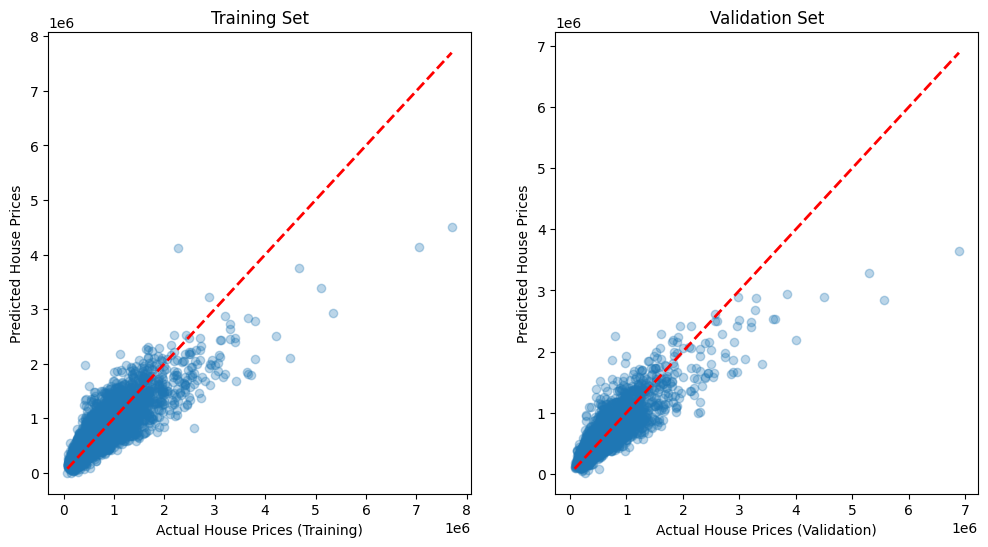

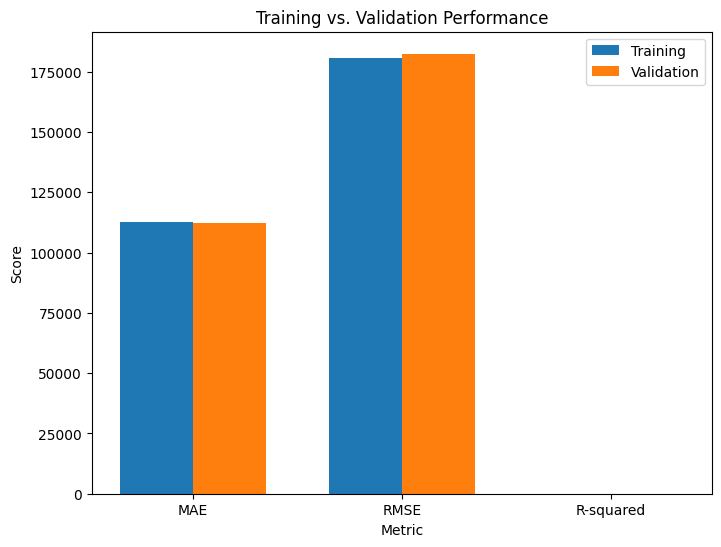

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Models
lin_reg = LinearRegression()
lin_reg.fit(house_x_train, house_y_train.values.ravel())
lin_reg_preds = lin_reg.predict(house_x_valid)
lin_reg_mae = mean_absolute_error(house_y_valid, lin_reg_preds)
lin_reg_rmse = mean_squared_error(house_y_valid, lin_reg_preds, squared=False)
lin_reg_r2 = r2_score(house_y_valid, lin_reg_preds)

ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(house_x_train, house_y_train.values.ravel())
ridge_reg_preds = ridge_reg.predict(house_x_valid)
ridge_reg_mae = mean_absolute_error(house_y_valid, ridge_reg_preds)
ridge_reg_rmse = mean_squared_error(house_y_valid, ridge_reg_preds, squared=False)
ridge_reg_r2 = r2_score(house_y_valid, ridge_reg_preds)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(house_x_train, house_y_train.values.ravel())
lasso_reg_preds = lasso_reg.predict(house_x_valid)
lasso_reg_mae = mean_absolute_error(house_y_valid, lasso_reg_preds)
lasso_reg_rmse = mean_squared_error(house_y_valid, lasso_reg_preds, squared=False)
lasso_reg_r2 = r2_score(house_y_valid, lasso_reg_preds)

# Neural Network Models
mlp_reg_1 = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, early_stopping=True)
mlp_reg_1.fit(house_x_train, house_y_train.values.ravel())
mlp_reg_1_preds = mlp_reg_1.predict(house_x_valid)
mlp_reg_1_mae = mean_absolute_error(house_y_valid, mlp_reg_1_preds)
mlp_reg_1_rmse = mean_squared_error(house_y_valid, mlp_reg_1_preds, squared=False)
mlp_reg_1_r2 = r2_score(house_y_valid, mlp_reg_1_preds)

mlp_reg_2 = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, early_stopping=True)
mlp_reg_2.fit(house_x_train, house_y_train.values.ravel())
mlp_reg_2_preds = mlp_reg_2.predict(house_x_valid)
mlp_reg_2_mae = mean_absolute_error(house_y_valid, mlp_reg_2_preds)
mlp_reg_2_rmse = mean_squared_error(house_y_valid, mlp_reg_2_preds, squared=False)
mlp_reg_2_r2 = r2_score(house_y_valid, mlp_reg_2_preds)

# Table to compare model performance
models = [
    ('Linear Regression', lin_reg_mae, lin_reg_rmse, lin_reg_r2),
    ('Ridge Regression', ridge_reg_mae, ridge_reg_rmse, ridge_reg_r2),
    ('Lasso Regression', lasso_reg_mae, lasso_reg_rmse, lasso_reg_r2),
    ('MLP Regression (64, 32)', mlp_reg_1_mae, mlp_reg_1_rmse, mlp_reg_1_r2),
    ('MLP Regression (128, 64)', mlp_reg_2_mae, mlp_reg_2_rmse, mlp_reg_2_r2)
]

print('Model Performance Comparison:')
print('{:<25} {:<15} {:<15} {:<15}'.format('Model', 'MAE', 'RMSE', 'R-squared'))
for name, mae, rmse, r2 in models:
    print('{:<25} {:<15,.4f} {:<15,.4f} {:<15,.4f}'.format(name, mae, rmse, r2))

# Best Performing Model: MLP Regression (128, 64)
mlp_reg_best = mlp_reg_2
train_preds = mlp_reg_best.predict(house_x_train)
val_preds = mlp_reg_best.predict(house_x_valid)

# Evaluate model performance
train_mae = mean_absolute_error(house_y_train, train_preds)
train_rmse = mean_squared_error(house_y_train, train_preds, squared=False)
train_r2 = r2_score(house_y_train, train_preds)

val_mae = mlp_reg_2_mae
val_rmse = mlp_reg_2_rmse
val_r2 = mlp_reg_2_r2

print('\nBest Model: MLP Regression (128, 64)')
print(f'Training MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R-squared: {train_r2:.4f}')
print(f'Validation MAE: {val_mae:.4f}, RMSE: {val_rmse:.4f}, R-squared: {val_r2:.4f}')

# Visualize actual vs. predicted price ranges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(house_y_train, train_preds, alpha=0.3)
plt.plot([house_y_train.min(), house_y_train.max()], [house_y_train.min(), house_y_train.max()], 'r--', lw=2)
plt.xlabel('Actual House Prices (Training)')
plt.ylabel('Predicted House Prices')
plt.title('Training Set')

plt.subplot(1, 2, 2)
plt.scatter(house_y_valid, val_preds, alpha=0.3)
plt.plot([house_y_valid.min(), house_y_valid.max()], [house_y_valid.min(), house_y_valid.max()], 'r--', lw=2)
plt.xlabel('Actual House Prices (Validation)')
plt.ylabel('Predicted House Prices')
plt.title('Validation Set')
plt.show()

# Compare training and validation performance
performance = ['MAE', 'RMSE', 'R-squared']
train_scores = [train_mae, train_rmse, train_r2]
val_scores = [val_mae, val_rmse, val_r2]

plt.figure(figsize=(8, 6))
x = np.arange(len(performance))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training')
plt.bar(x + width/2, val_scores, width, label='Validation')
plt.xticks(x, performance)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Training vs. Validation Performance')
plt.legend()
plt.show()

# Reference: